In [1]:
!pip install -U statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [4]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [5]:
df.index.freq = 'MS'

In [6]:
df.shape

(144, 1)

Walk-Forward Validation is a Time Series equivalent of a Cross Validation Train Test Split

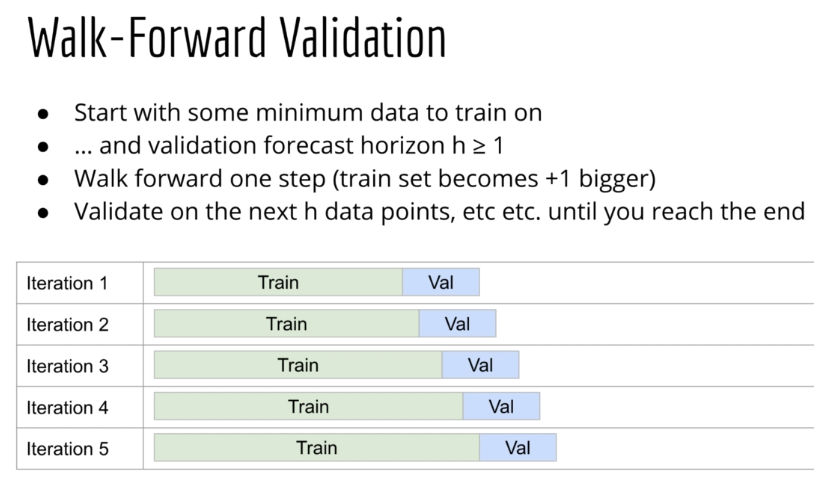

In [7]:
# Set forecast horizon and steps
# The forecast horizon is the length of time into the future 
# for which forecasts are to be prepared

# Assume the horizon is 12 with 10 steps of data

# The effective validation period discovered by the author called Ntest 
# is the length of entire dataframe - h - steps + 1

h = 12
steps = 10
Ntest = len(df) - h - steps + 1

In [11]:
# Configure several hyperparameters

trend_type_list = ['add', 'mull']
seasonal_type_list = ['add', 'mul']
damped_trend_list = [True, False]
init_method_list = ['estimated', 'heuristic', 'legacy-heuristic']
use_boxcox_list = [True, False, 0]

In [20]:
def walkforward(trend_type,
                 seasonal_type,
                 damped_trend,
                 init_method,
                 use_boxcox,
                 debug=False):
   # Store errors
   # seen_last used as a flag to indicate whether the code has looped to the
   # last row of the dataframe or not to ensure that we have the correct loop limit

   # steps_completed will increment by one each round and should have the same number
   # as the number of loops we set which is 10

   errors = []
   seen_last = False
   steps_completed = 0

   for end_of_train in range(Ntest, len(df) - h + 1):
     #
     #
     #
     train = df.iloc[:end_of_train]
     test = df.iloc[end_of_train:end_of_train + h]

     if test.index[-1] == df.index[-1]:
       seen_last = True


     steps_completed += 1

     hw = ExponentialSmoothing(train['Passengers'],
                                initialization_method=init_method,
                                trend=trend_type,
                                damped_trend=damped_trend,
                                seasonal=seasonal_type,
                                seasonal_periods=12,
                                use_boxcox=use_boxcox)
     res_hw = hw.fit()

     # Compute error for the forecast horizon
     fcast = res_hw.forecast(h)
     error = mean_squared_error(test['Passengers'], fcast)
     errors.append(error)

     if debug:
       print("seen last:", seen_last)
       print("steps completed:", steps_completed)

     return np.mean(errors)

In [22]:
# Test the function
# The expected outputs are
# seen last: True
# steps completed: 10

walkforward('add', 'add', False, 'legacy-heuristic', 0, debug=True)

seen last: False
steps completed: 1


4480.043168757548

In [23]:
# Iterate through all possible options

tuple_of_option_lists = (trend_type_list, seasonal_type_list,
                         damped_trend_list, init_method_list,
                         use_boxcox_list, )

for x in itertools.product(*tuple_of_option_lists):
  print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [24]:
# Putting all together and using walk forward to find the best options

best_score = float('inf')
best_options = None
for x in itertools.product(*tuple_of_option_lists):
  score = walkforward(*x)

  if score < best_score:
    print("Best score so far:", score)
    best_score = scorebest_options = x


Best score so far: 380.6526017685629


TypeError: ignored

In [ ]:
print("Best score:", best_score)

trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
print("trend_type", trend_type)
print("seasonal_type", seasonal_type)
print("damped_trend", damped_trend)
print("init_method", init_method)
print("use_boxcox", use_boxcox)

Best score: ('add', 'add', True, 'estimated', True)


TypeError: ignored